In [1]:
import numpy as np
import matplotlib.pyplot as plt
import copy
from lab_utils_uni import plt_contour_wgrad

In [2]:
x_train = np.array([1.0, 2.0])
y_train = np.array([300.0, 500.0])

In [3]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost_sum = 0
    for i in range(m):
        f_wb = w * x[i] + b
        cost = (f_wb - y[i]) ** 2
        cost_sum += cost
    
    return cost_sum / (2 * m)

In [4]:
def commpute_gradient(x,y,w,b):
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = (f_wb - y[i])
        dj_dw += dj_dw_i
        dj_db += dj_db_i
    dj_dw /= m
    dj_db /= m

    return dj_dw, dj_db

In [11]:
def gradient(x,y,temp_w,temp_b,alpha,cost_function,gradient_function):
    w = copy.deepcopy(temp_w)
    b = copy.deepcopy(temp_b)

    j_history = [] # Cost function history
    p_history = [] # Paramenter history [w,b]
    stop_i = 0
    while (True):
        dj_dw, dj_db = gradient_function(x,y,w,b)

        w = w - (alpha * dj_dw)
        b = b - (alpha * dj_db)

        if stop_i > 0:
            tp_w,tp_b = p_history[-1]

            if abs(tp_w - w) <= 1.0e-8 and abs(tp_b - b) <= 1.0e-8:
                p_history.append([w,b])
                j_history.append(cost_function(x,y,w,b))
                stop_i += 1
                break

        p_history.append([w,b])
        stop_i += 1

        j_history.append(cost_function(x,y,w,b))

        if stop_i%1000 == 0:
            print(f"Iteration {stop_i:4}: Cost {j_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
            
    return w, b, j_history, p_history 

In [12]:
w, b, j_history, p_history = gradient(x_train,y_train,0,0,1.0e-2,compute_cost,commpute_gradient)
print(f"(w,b) found by gradient descent: ({w:8.4f},{b:8.4f})")

Iteration 1000: Cost 3.42e+00  dj_dw: -3.715e-01, dj_db:  6.011e-01   w:  1.949e+02, b: 1.08234e+02
Iteration 2000: Cost 7.94e-01  dj_dw: -1.791e-01, dj_db:  2.897e-01   w:  1.975e+02, b: 1.03969e+02
Iteration 3000: Cost 1.84e-01  dj_dw: -8.632e-02, dj_db:  1.397e-01   w:  1.988e+02, b: 1.01913e+02
Iteration 4000: Cost 4.29e-02  dj_dw: -4.161e-02, dj_db:  6.732e-02   w:  1.994e+02, b: 1.00922e+02
Iteration 5000: Cost 9.96e-03  dj_dw: -2.006e-02, dj_db:  3.245e-02   w:  1.997e+02, b: 1.00445e+02
Iteration 6000: Cost 2.31e-03  dj_dw: -9.667e-03, dj_db:  1.564e-02   w:  1.999e+02, b: 1.00214e+02
Iteration 7000: Cost 5.38e-04  dj_dw: -4.660e-03, dj_db:  7.540e-03   w:  1.999e+02, b: 1.00103e+02
Iteration 8000: Cost 1.25e-04  dj_dw: -2.246e-03, dj_db:  3.634e-03   w:  2.000e+02, b: 1.00050e+02
Iteration 9000: Cost 2.90e-05  dj_dw: -1.083e-03, dj_db:  1.752e-03   w:  2.000e+02, b: 1.00024e+02
Iteration 10000: Cost 6.75e-06  dj_dw: -5.219e-04, dj_db:  8.445e-04   w:  2.000e+02, b: 1.00012e+02

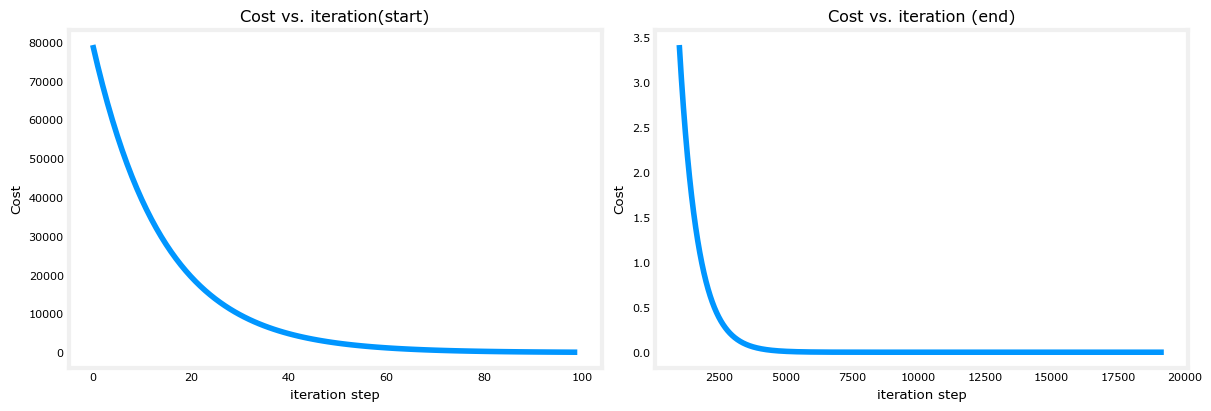

In [7]:
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12,4))
ax1.plot(j_history[:100])
ax2.plot(1000 + np.arange(len(j_history[1000:])), j_history[1000:])
ax1.set_title("Cost vs. iteration(start)");  ax2.set_title("Cost vs. iteration (end)")
ax1.set_ylabel('Cost')            ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')  ;  ax2.set_xlabel('iteration step') 
plt.show()

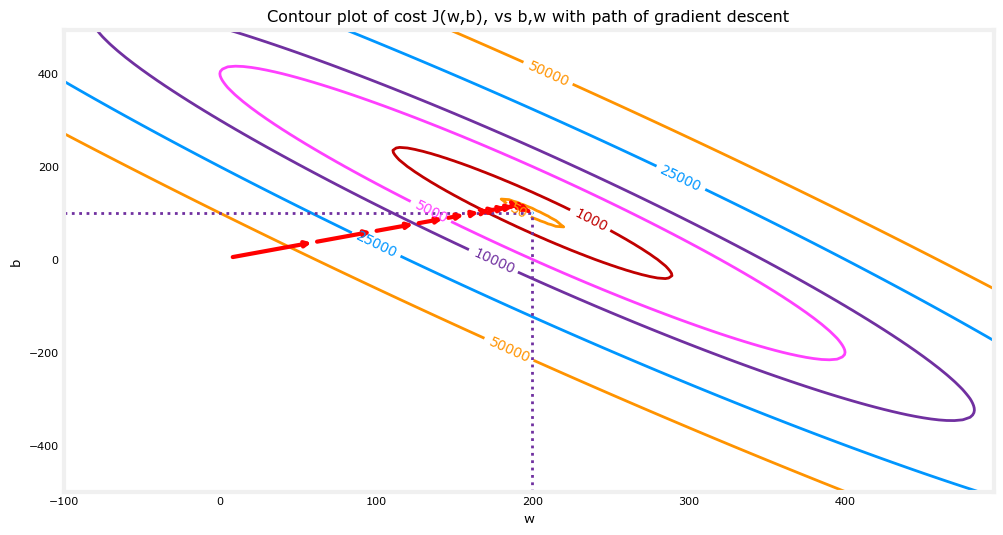

In [8]:
fig, ax = plt.subplots(1,1, figsize=(12, 6))
plt_contour_wgrad(x_train, y_train, p_history, ax)